## Enriching Objects

In Jupyter notebooks you can emit rich media types like `text/html`, `application/json`, `text/markdown`, `image/png` and many others. Most famously, pandas DataFrames were really easy to work with

```python
import pandas as pd
df = pd.DataFrame({
    'Dinosaur': ['T-Rex', 'Velociraptor', 'Stegosaurus'],
    'Period': ['Cretaceous', 'Cretaceous', 'Jurassic'],
    'Length_meters': [12, 2, 9]
})
df
```

| Dinosaur     | Period      | Length_meters |
|--------------|-------------|---------------|
| T-Rex        | Cretaceous  | 12            |
| Velociraptor | Cretaceous  | 2             |
| Stegosaurus  | Jurassic    | 9             |


In Python library authors only had to add `__repr__` for `text/plain`, `_repr_html_` for `text/html`, or others to their classes. Then people just wrote code like they would in a REPL while getting nice tables and everything out.


```python
from typing import List, Dict, Union
import html

class FakeDataFrame:
    def __init__(self, data: Dict[str, List[Union[str, int, float]]]) -> None:
        """Initialize DataFrame with dictionary data."""
        self.data = data
        self.columns = list(data.keys())
        self.length = len(next(iter(data.values())))

    def _repr_html_(self) -> str:
        html_rows = []

        header_html = "".join([f"<th>{html.escape(col)}</th>" for col in self.columns])
        html_rows.append(f"<tr>{header_html}</tr>")

        for i in range(self.length):
            row_html = "".join(
                [f"<td>{html.escape(str(self.data[col][i]))}</td>" for col in self.columns]
            )
            html_rows.append(f"<tr>{row_html}</tr>")

        return f"<table>{''.join(html_rows)}</table>"
```


We can do the same with `deno` by defining a special symbol on a class (or any object!):

```
Symbol.for("Jupyter.display")
```

Let's create a little 2D vector class.

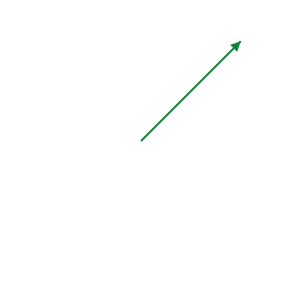

In [1]:
class Vector2D {
  x: number;
  y: number;

  constructor(x: number, y: number) {
    this.x = x;
    this.y = y;
  }

  [Symbol.for("Jupyter.display")]() {
    // Calculate viewbox size based on vector magnitude
    const magnitude = Math.sqrt(this.x ** 2 + this.y ** 2);
    const viewboxSize = Math.max(100, 2 * magnitude);
    const center = viewboxSize / 2;
      
    const color = "#15803d"

    return {
      "text/plain": `Vector2D(x: ${this.x}, y: ${this.y})`,
      "image/svg+xml": `
          <svg height="${viewboxSize}" width="${viewboxSize}" viewBox="0 0 ${viewboxSize} ${viewboxSize}">
            <defs>
              <marker id="arrowhead" markerWidth="5" markerHeight="5"
              refX="5" refY="2.5" orient="auto">
                <polygon points="0 0, 5 2.5, 0 5" fill="${color}" />
              </marker>
            </defs>

            <line x1="${center}" y1="${center}" x2="${center + this.x}" y2="${center - this.y}"
            style="stroke:${color};stroke-width:2" marker-end="url(#arrowhead)" />
          </svg>
      `
    };
  }
}

const v = new Vector2D(100, 100);
v

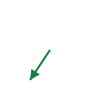

In [2]:
new Vector2D(-20, -30);

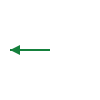

In [3]:
new Vector2D(-40, 0);

## Modules

Where the real power comes in is having custom representations for objects like:

* DataFrames
* Plots
* Components

Get out there and add `Symbol.for("Jupyter.display")` to your classes today!

